# AdaBoost

Адаптивный бустинг - использует ансамбли слабых моделей и затем объединяет их с помощью взвешенной суммы. Слабые модели используются при построении следующих слабых моделей, уточняя их поведение для неправильно классифицированных точек. Weak learner - слабая модель - слишком простая модель, которая не дает хороших результатов.

**Исследуем данные о грибах для предсказания съдобен ли гриб или неь, а также создать предупреждающий совет для собирателей грибов.**

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [15]:
df = pd.read_csv(r"C:\Users\mmd28\OneDrive\Рабочий стол\Academic potfolio\Classical Machine Learning\Supervised learning\Classification\data\mushrooms.csv")

In [16]:
df.head(3)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m


У нас будет 2 значения класса:
- р -poisonous - ядовитый
- e - edible - съедобный

Большая часть признаков категориальные

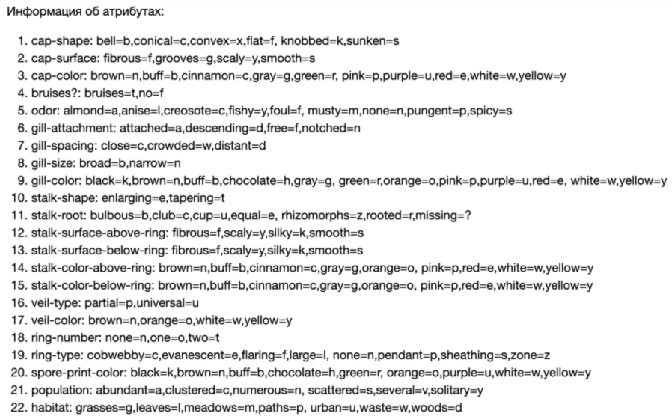

In [17]:
from PIL import Image
img = Image.open(r"C:\Users\mmd28\OneDrive\Рабочий стол\Academic potfolio\Classical Machine Learning\Supervised learning\Classification\data\mushrooms features.png")
img

Посмотрим, насколько данные целевой переменной сбаллансированны

<Axes: xlabel='class', ylabel='count'>

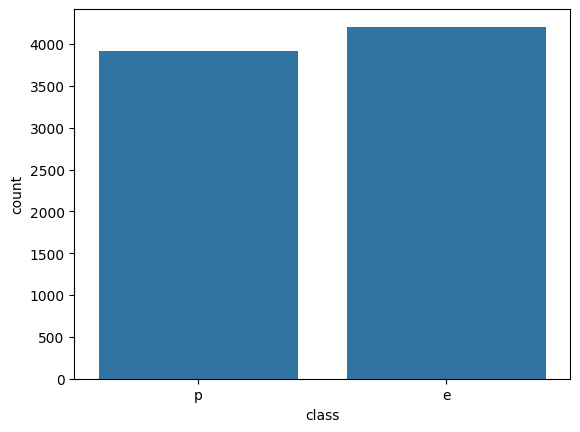

In [18]:
sns.countplot(data=df, x='class')

Классы сбаллансированы. Изучим описательную статистику некатегориальных признаков.

In [19]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


По строке count (сколько строк содержит определенной значение) мы можем предположить, что в колонках нет отсутствующих значений. По строке unique мы видим уникальные значения по категориям и они достаточно разнообразны. Строка Top - показывает, какое значение чаще всего встречается в той или иной колонке. Строка freq отображает количество строк для наиболее частого значения.

Визуализируем количество уникальных значений, поместим названия признаков в отдельную колонку и отсортируем данные по признаку уникальности.

In [20]:
df.describe().transpose().reset_index().sort_values('unique')

,index,count,unique,top,freq
16,veil-type,8124,1,p,8124
0,class,8124,2,e,4208
4,bruises,8124,2,f,4748
6,gill-attachment,8124,2,f,7914
7,gill-spacing,8124,2,c,6812
8,gill-size,8124,2,b,5612
10,stalk-shape,8124,2,t,4608
18,ring-number,8124,3,o,7488
2,cap-surface,8124,4,y,3244
17,veil-color,8124,4,w,7924


Признаки с большим количеством уникальных значений имеют больший вес. Визуализируем эти данные.

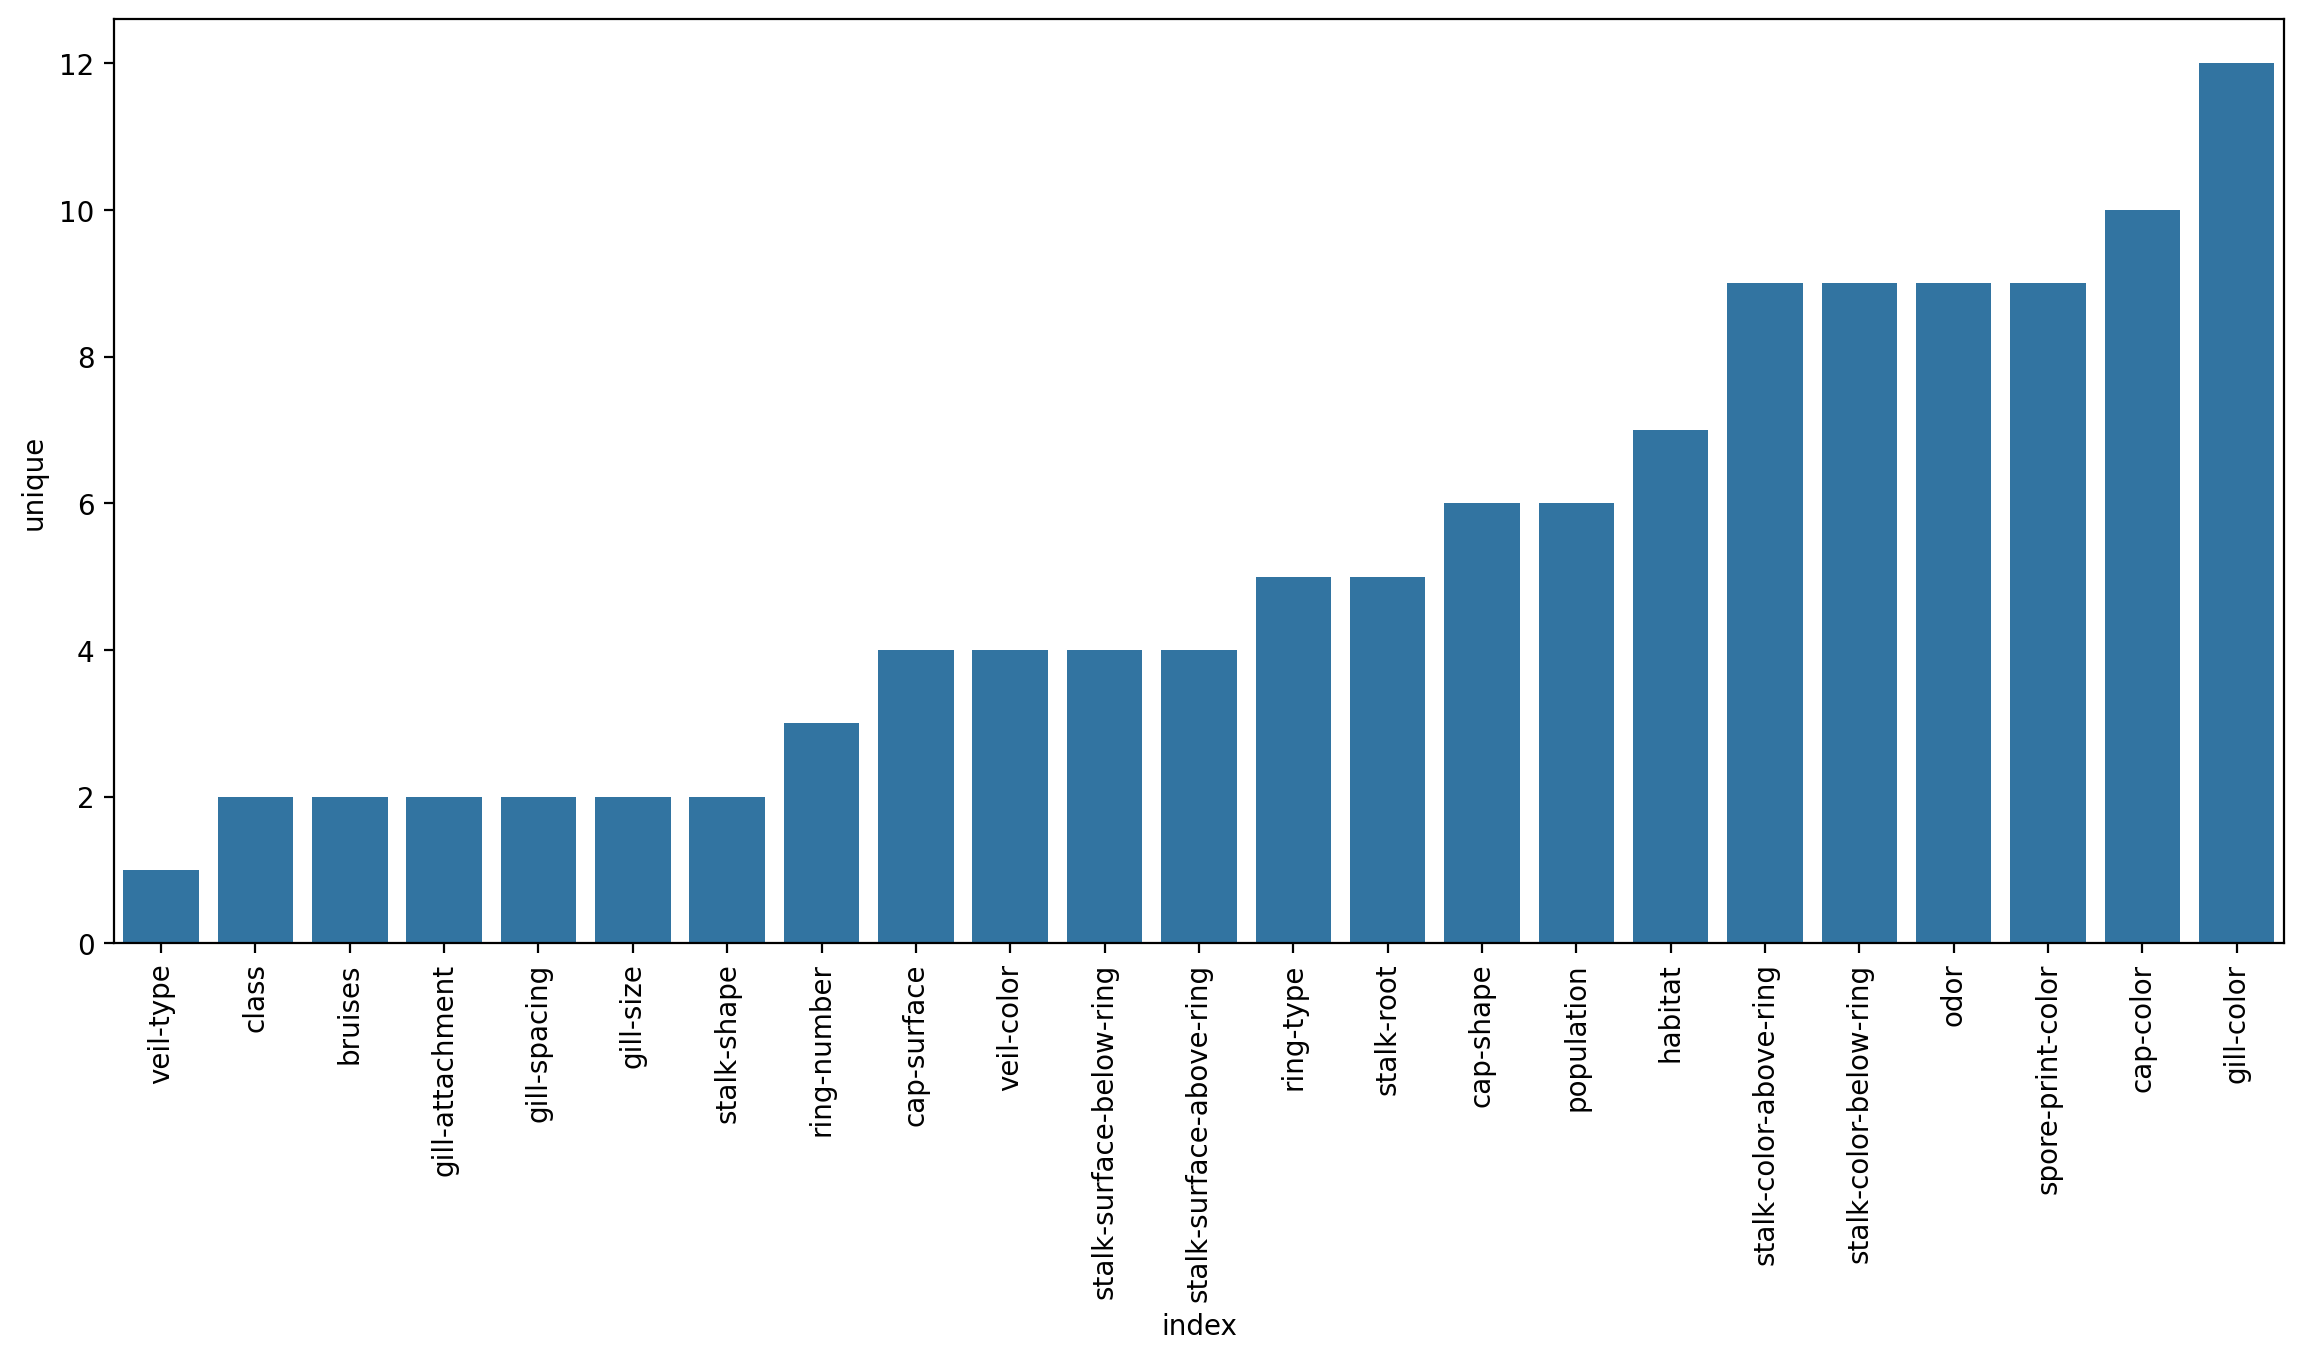

In [21]:
feat_uniq = df.describe().transpose().reset_index().sort_values('unique')

plt.figure(figsize=(14, 6), dpi=200)
sns.barplot(data=feat_uniq, x='index', y='unique')
plt.xticks(rotation=90);

Эта информация нам поможет для создания рекомендаций собираетлям грибов

Подготовим данные для машинного обучения

In [22]:
X = df.drop('class', axis=1)
y = df['class']

Посмотрим на отсутствующие значения в признаках и преобразуем категориальные признаки в дамми-переменные

In [23]:
X.isnull().sum()

cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [24]:
X = pd.get_dummies(X, drop_first=True)

In [25]:
X

,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,False,False,False,False,True,False,True,False,False,False,...,False,True,False,False,False,False,False,False,True,False
1,False,False,False,False,True,False,True,False,False,False,...,True,False,False,False,True,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,True,False,False,False,False,False,True,False,False,False
3,False,False,False,False,True,False,False,True,False,False,...,False,True,False,False,False,False,False,False,True,False
4,False,False,False,False,True,False,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,False,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False
8120,False,False,False,False,True,False,True,False,False,False,...,False,False,True,False,False,True,False,False,False,False
8121,False,True,False,False,False,False,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False
8122,False,False,True,False,False,False,False,True,False,False,...,False,False,True,False,False,True,False,False,False,False


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

In [27]:
from sklearn.ensemble import AdaBoostClassifier

В параметр base_estimator мы указываем базовую модель мошинного обучения, поверх которой будет работать адаптивный бустинг. Чаще всего используется модель деревьев. Адабуст берет эту модель, обучает её и делает копии.

Параметр n_estimators означает, что модель выбирает n-количество наилучших признаков, по колотым выполнять разбиение данных. В нашей задаче мы выберем 1 для того, что бы выбрать предостережение для сборщиков грибов.

In [28]:
model = AdaBoostClassifier(n_estimators=1)

In [29]:
model.fit(X_train, y_train)

c:\Users\mmd28\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(n_estimators=1)

In [30]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [31]:
predictions = model.predict(X_test)

In [32]:
predictions

array(['p', 'e', 'p', ..., 'p', 'p', 'e'], dtype=object)

In [34]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           e       0.96      0.81      0.88       655
           p       0.81      0.96      0.88       564

    accuracy                           0.88      1219
   macro avg       0.88      0.88      0.88      1219
weighted avg       0.89      0.88      0.88      1219



У нас 1 дерево с 1 узлом разбиения признаков (дамми переменные). Мы получили 88% по метрике accuracy - один признак на 88% самый важный. Посмотрим по какому признакоку происходит разбиение данных. 

In [ ]:
model.feature_importances_  # мы видим только одну еденицу - наш простейший признак важен на 100%.

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [36]:
# Выясним индекс этой еденицы
model.feature_importances_.argmax()

np.int64(22)

Наибольшую важность имеет признак с индексом 22. Посмотрим на него.

In [37]:
X.columns[22]

'odor_n'

odor_n - мы получили наиболее важный признак - Отсутствие запаха odor none. Значит в качестве предостережнеия модель рекомендует запах гриба. Если он пахнет, то гриб не съедобный.

<Axes: xlabel='odor', ylabel='count'>

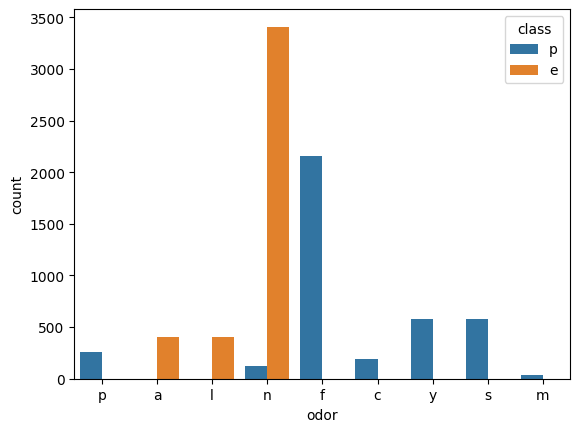

In [39]:
sns.countplot(data=df, x='odor', hue='class')

Мы видим, что большинство грибов, которые не имеют запаха съедобные. Это будет наш первый критерий для предупреждения собирателей.

Улучшим модель, добавив количество признаков - дополнительные деревья решений. 

Проверим количество наших признаков с учетом дамми - переменных

In [40]:
len(X.columns)

95

У нас 95 признаков. Напишем цикл, чтобы посмотреть, как будут менять модели при постепенном увеличении деревьев решений. Этот цикл является методом локтя - альтернатива поиска по сетке.

In [41]:
error_rates = []

for n in range(1, 96):
    model = AdaBoostClassifier(n_estimators=n)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    error = 1 - accuracy_score(y_test, preds)

    error_rates.append(error)

c:\Users\mmd28\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\mmd28\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\mmd28\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\mmd28\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is 

При добавлении каждого дерева (от 1 до 95) мы будем видеть, как уменьшается ошибка. При 1 дереве у нас было 12% ошибки (accuracy = 0.88). так мы смодем понять, какое количество деревьев выбрать - когда количество ошибок выйдет на плато и перестанет уменьшаться.

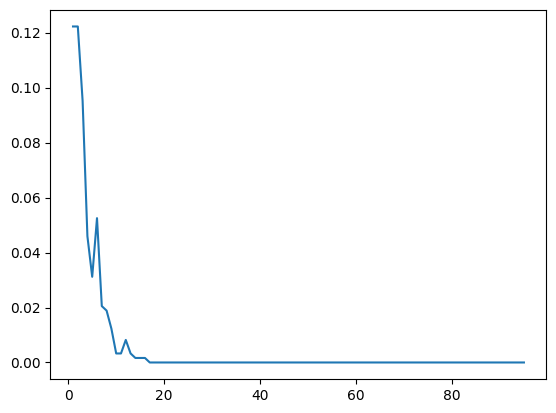

In [42]:
plt.plot(range(1, 96), error_rates)

Старт работы начинается с 12% ошибки = 1 дереву. Выход на плато происходит в районе 20 деревьев. Далее не имеет смысла увеличивать значение n_estimators.

Посмотрим на важность признаков в модели с 95 деревьями.

In [43]:
model

AdaBoostClassifier(n_estimators=95)

In [44]:
model.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.01052632, 0.        ,
       0.        , 0.01052632, 0.        , 0.        , 0.        ,
       0.01052632, 0.        , 0.05263158, 0.03157895, 0.03157895,
       0.        , 0.        , 0.06315789, 0.02105263, 0.        ,
       0.        , 0.        , 0.09473684, 0.09473684, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.01052632, 0.01052632, 0.        , 0.        , 0.        ,
       0.06315789, 0.        , 0.        , 0.        , 0.        ,
       0.03157895, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.06315789, 0.        , 0.        ,
       0.01052632, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.01052632, 0.        , 0.        , 0.     

Ничего не понятно. Создадим датафрейм и уберем все признаки с нулевой важностью (модель вообще их не рассматривает).

In [46]:
feats = pd.DataFrame(index=X.columns, data=model.feature_importances_, columns=['Важность'])

In [47]:
feats

,Важность
cap-shape_c,0.000000
cap-shape_f,0.000000
cap-shape_k,0.000000
cap-shape_s,0.000000
cap-shape_x,0.000000
...,...
habitat_l,0.000000
habitat_m,0.000000
habitat_p,0.000000
habitat_u,0.000000


In [48]:
imp_feats = feats[feats['Важность'] > 0]

In [49]:
imp_feats

,Важность
cap-color_c,0.010526
cap-color_n,0.010526
cap-color_w,0.010526
bruises_t,0.052632
odor_c,0.031579
odor_f,0.031579
odor_n,0.063158
odor_p,0.021053
gill-spacing_w,0.094737
gill-size_n,0.094737


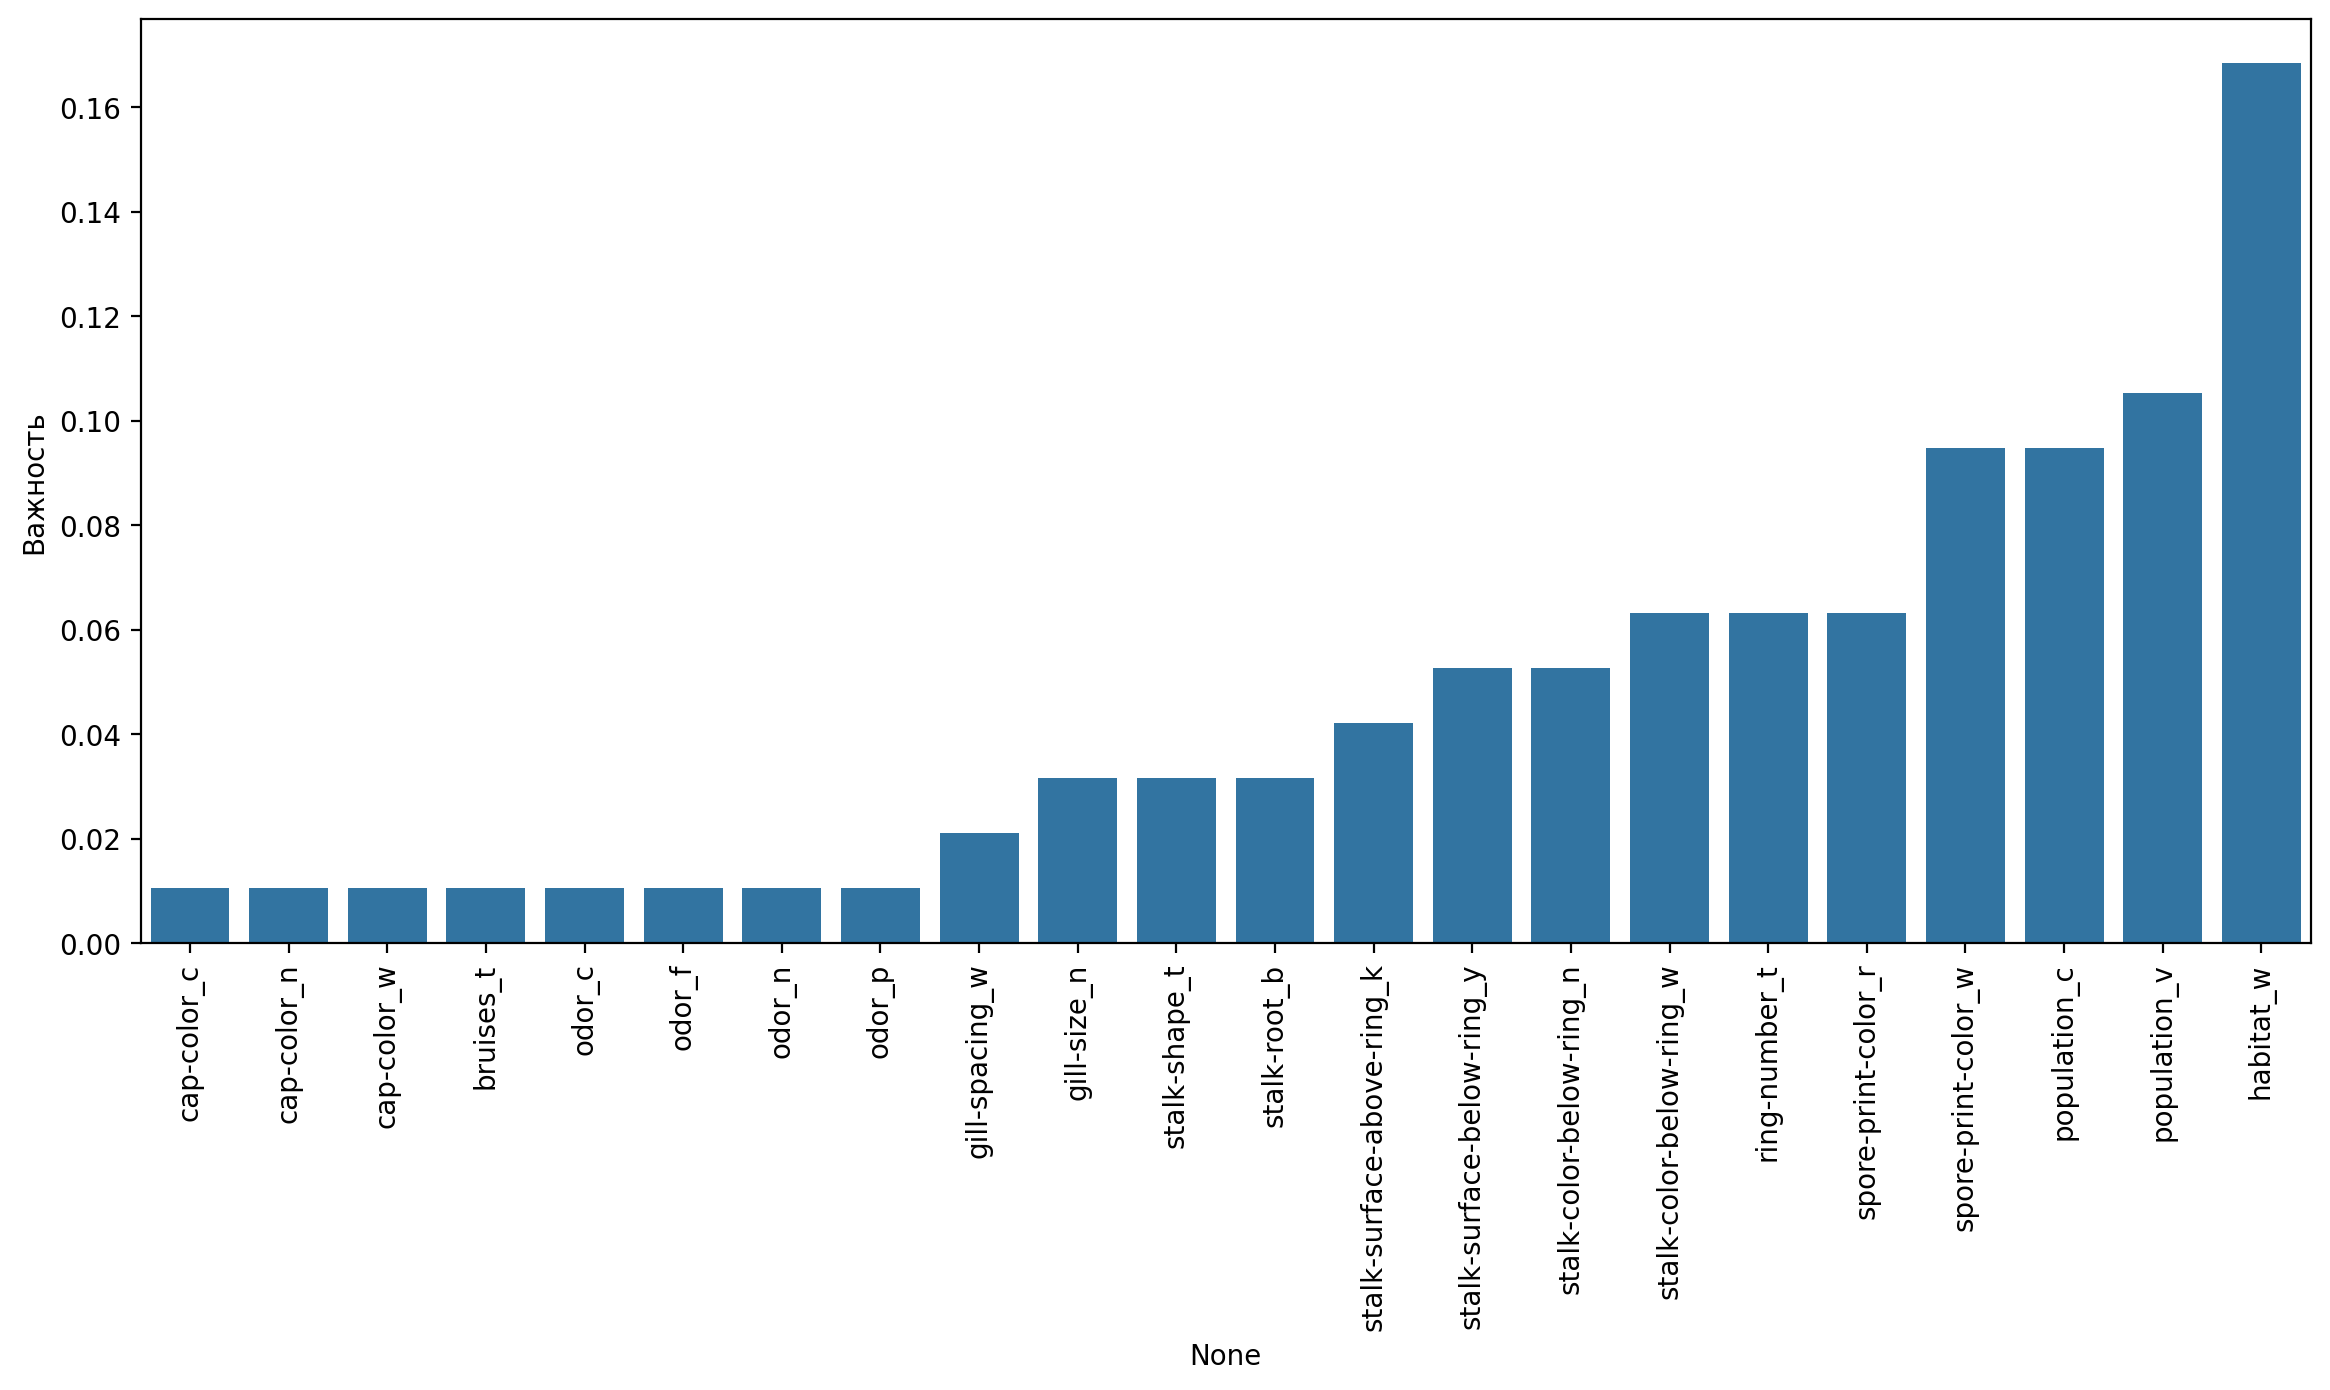

In [53]:
plt.figure(figsize=(14, 6), dpi=200)
sns.barplot(data=imp_feats.sort_values('Важность'), x=imp_feats.index, y='Важность')
plt.xticks(rotation=90);

Сейчас мы видим, что признак oder_n не является самым важным.